In [1]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
#json reading using pandas
tweets_pd = pd.read_json('classified_tweets_latest.json', orient='columns')

In [4]:
tweets_pd.head()
tweets_text = (tweets_pd['tweet'].apply(lambda tweet : eval(tweet))).apply(lambda tweet : tweet['text'])
tweets_pd = tweets_pd.assign(tweets_text = tweets_text)

In [5]:
#missing values checking for label_data
tweets_pd = tweets_pd.loc[tweets_pd['food'] != 'None']
tweets_pd = tweets_pd.loc[tweets_pd['label_data'] != '']
print(tweets_pd.shape)

(7294, 16)


In [6]:
tweets_pd['label_data'] = tweets_pd.label_data.str.lower()
tweets_pd['tweets_text'] = tweets_pd.tweets_text.apply(lambda x: ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)",'',x).split()))
print(tweets_pd.head(3))

  borne class  conf  count exercise food label_data  runid  \
0  None  FOOD     1      1     None    1       junk      1   
1  None  FOOD     1      1     None    1  unhealthy      1   
2  None  FOOD     1      1     None    1       junk      1   

                 stamp                                             status  \
0  2017-01-26 06:37:29  @NicholasUnder @machineiv  dip them alive in m...   
1  2017-01-26 06:37:30  Looking forward to the weekend so i can eat my...   
2  2017-01-26 06:37:30                                Baking soda that is   

  statusvec                        time  \
0      None  2017-06-05 22:49:46.662565   
1      None  2017-06-05 22:49:47.360769   
2      None  2017-06-05 22:50:17.088828   

                                               tweet             tweetid  \
0  {'retweet_count': 0, 'favorited': False, 'crea...  824506529873350656   
1  {'retweet_count': 0, 'favorited': False, 'crea...  824506531941117952   
2  {'retweet_count': 0, 'favorited': Fals

In [7]:
#after removing special characters, we left with plain data with alphanumeric characters
#seperate the data based on their class
tweets_pd_food = tweets_pd.loc[tweets_pd.food == '1']
tweets_pd_borne = tweets_pd.loc[tweets_pd.borne == '1']
tweets_pd_exercies = tweets_pd.loc[tweets_pd.exercise == '1']

In [8]:
#tweets_pd.loc[tweets_pd.food == '1']

In [9]:
print("tweets with food dataframe shape is {}".format(tweets_pd_food.shape))
print("tweets with borne dataframe shape is {}".format(tweets_pd_borne.shape))
print("tweets with exercises dataframe shape is {}".format(tweets_pd_exercies.shape))

tweets with food dataframe shape is (7294, 16)
tweets with borne dataframe shape is (470, 16)
tweets with exercises dataframe shape is (2201, 16)


In [10]:
#shrink the data frame with independent features i.e. tweets text

In [11]:
pd_792017 = pd.read_json('07292017.json', orient='columns')
pd_8022017 = pd.read_json('08022017.json', orient='columns')
pd_8072017 = pd.read_json('08072017.json', orient='columns')
pd_8082017 = pd.read_json('08082017.json', orient='columns')
pd_8242017 = pd.read_json('08242017.json', orient='columns')

In [12]:
tweets_data = pd.concat([pd_792017, pd_8022017, pd_8072017, pd_8082017, pd_8242017], ignore_index=True)
tweets_data_text = (tweets_data.tweet.apply(lambda tweet: eval(tweet))).apply(lambda text: text['text'])

In [13]:
#data with 9 columns
tweets_data = tweets_data.assign(tweets_data_text = tweets_data_text)
#tweets_data_text.head()
#change the labels into category codes
tweets_data.food = tweets_data.food.astype("category")

In [14]:
print(tweets_data.shape)
#remove the tweets without label_data
print("data with labels {}".format(sum(tweets_data['label_data'] != '')))
print("removing data without labels")
#missing values checking for label_data
tweets_data = tweets_data.loc[tweets_data['label_data'] != '']
print("after removing the shape of the data is{}".format(tweets_data.shape))

(28246, 10)
data with labels 26922
removing data without labels
after removing the shape of the data is(26922, 10)


In [15]:
tweets_data.head(3)

,borne,exercise,food,label_data,runid,time,tweet,tweetid,userid,tweets_data_text
0,1,0,0,Irrelevant,1,2017-07-21T21:56:12.794351,"{'coordinates': None, 'filter_level': 'low', '...",822483724524625921,jason_a,RT @_skull_queen_: So..... has anyone ever act...
1,1,0,0,Irrelevant,1,2017-07-21T21:56:12.794351,"{'coordinates': None, 'filter_level': 'low', '...",822513204706349056,jason_a,RT @_skull_queen_: So..... has anyone ever act...
2,1,0,0,Irrelevant,1,2017-07-21T21:56:12.794351,"{'coordinates': None, 'filter_level': 'low', '...",822551023067795458,jason_a,RT @_skull_queen_: So..... has anyone ever act...


In [16]:
tweets_data['label_data'] = tweets_data.label_data.str.lower()
tweets_data['tweets_text'] = tweets_data.tweets_data_text.apply(lambda x: ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)",'',x).split()))
print(tweets_data.tweets_data_text.head())

0    RT @_skull_queen_: So..... has anyone ever act...
1    RT @_skull_queen_: So..... has anyone ever act...
2    RT @_skull_queen_: So..... has anyone ever act...
3    RT @_skull_queen_: So..... has anyone ever act...
4    RT @_skull_queen_: So..... has anyone ever act...
Name: tweets_data_text, dtype: object


In [17]:
#after removing special characters, we left with plain data with alphanumeric characters
#seperate the data based on their class
tweets_data_food = tweets_data.loc[tweets_data.food == 1]
tweets_data_borne = tweets_data.loc[tweets_data.borne == 1]
tweets_data_exercies = tweets_data.loc[tweets_data.exercise == 1]

In [18]:
print("tweets with food dataframe shape is {}".format(tweets_data_food.shape))
print("tweets with borne dataframe shape is {}".format(tweets_data_borne.shape))
print("tweets with exercises dataframe shape is {}".format(tweets_data_exercies.shape))

tweets with food dataframe shape is (12210, 11)
tweets with borne dataframe shape is (16080, 11)
tweets with exercises dataframe shape is (268, 11)


In [19]:
tweets_data_food = tweets_data_food[['label_data','tweets_text']]
tweets_data_borne = tweets_data_borne[['label_data','tweets_text']]
tweets_data_exercies = tweets_data_exercies[['label_data','tweets_text']]
tweets_pd_food = tweets_pd_food[['label_data','tweets_text']]
tweets_pd_borne = tweets_pd_borne[['label_data','tweets_text']]
tweets_pd_exercies = tweets_pd_exercies[['label_data','tweets_text']]

In [22]:
tweets_food = pd.concat([tweets_data_food, tweets_pd_food])
tweets_borne = pd.concat([tweets_data_borne, tweets_pd_borne])
tweets_exercies = pd.concat([tweets_data_exercies, tweets_pd_exercies])

In [23]:
print("tweets with food dataframe shape is {}".format(tweets_food.shape))
print("tweets with borne dataframe shape is {}".format(tweets_borne.shape))
print("tweets with exercises dataframe shape is {}".format(tweets_exercies.shape))

tweets with food dataframe shape is (19504, 2)
tweets with borne dataframe shape is (16550, 2)
tweets with exercises dataframe shape is (2469, 2)


In [40]:
#'healthy','unhealthy','junk','relevant','irrelevant'
food_labels = ['healthy','unhealthy','junk']
borne_labels = exercise_labels = ['junk','relevant','irrelevant']

In [44]:
tweets_food = tweets_food.loc[tweets_food.label_data.isin(food_labels)]
tweets_borne = tweets_borne.loc[tweets_borne.label_data.isin(borne_labels)]
tweets_exercies = tweets_exercies.loc[tweets_exercies.label_data.isin(exercise_labels)]

#tweets_data_food.label_data.value_counts()

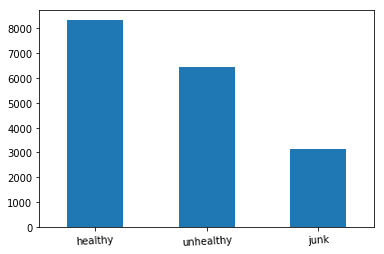

In [47]:
food_label_count = tweets_food.label_data.value_counts()
food_label_count.plot(kind = 'bar', rot=3)
plt.show()

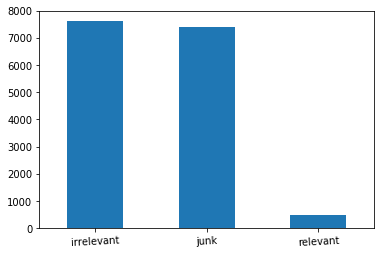

In [50]:
borne_label_count = tweets_borne.label_data.value_counts()
borne_label_count.plot(kind = 'bar', rot=3)
plt.show()

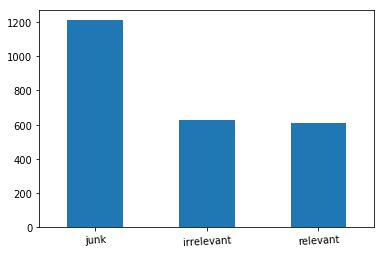

In [51]:
exercies_label_count = tweets_exercies.label_data.value_counts()
exercies_label_count.plot(kind = 'bar', rot=3)
plt.show()

In [52]:
# scrapping tweets text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer,RegexpTokenizer
from nltk.tokenize import RegexpTokenizer

from sklearn.decomposition import TruncatedSVD
import nltk
import gensim

## Feature Extraction from tweet text:
### counvectorizer steps for text formatting
### tep1: ialization, fit_tranforming, transforming

In [53]:
count_vectorizer = CountVectorizer(analyzer="word",tokenizer=nltk.word_tokenize, stop_words='english', max_df= 0.5, min_df=2,ngram_range=(1,3), max_features=None)

In [54]:
def twTokenizer(text):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text)

In [55]:
bag_of_words = count_vectorizer.fit_transform(tweets_food['tweets_text'])

In [56]:
count_vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.5,
 'max_features': None,
 'min_df': 2,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function nltk.tokenize.word_tokenize>,
 'vocabulary': None}

In [58]:
tweet_text_dtm = count_vectorizer.transform(tweets_food['tweets_text'])

In [59]:
type(tweet_text_dtm) #numpy doesnt support sparse type of matrix
#bag of words conversion means converting documents into tokens and then counting term frequencies and then normalization,
#we camt tell the position of words

scipy.sparse.csr.csr_matrix

In [60]:
#print(tweet_text_dtm) stores the coordinates of non zero values
#approach2 label emcoder scikit - learning
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
tweets_food['label_data'] = encoder.fit_transform(tweets_food['label_data'])
encoder.classes_
#food_tweets_pd['label_data'] =  food_tweets_pd['label_data'].astype('category')
#food_tweets_pd['label_data'] = food_tweets_pd['label_data'].cat.codes

array(['healthy', 'junk', 'unhealthy'], dtype=object)

In [69]:
tweets_food.shape
#encoder.fit_transform(food_tweets_pd['label_data'])

(17894, 2)

In [62]:
pd.DataFrame(tweet_text_dtm.toarray(), columns=count_vectorizer.get_feature_names()).head()

,0,0 classes,0 classes pizza,0120,0121,0121 mugla,0121 mugla turkey,0126,1,1 2,...,zima sick,zima sick kids,zimataco,zimataco fundraiser,zimataco fundraiser happening,zinc,zinc poisoning,zinc poisoning vomitted,zone,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
#truncated_bag_of_words = svd.fit_transform(bag_of_words)
#truncated_bag_of_words

In [70]:
X = pd.DataFrame(tweet_text_dtm.toarray(), columns=count_vectorizer.get_feature_names())
Y = tweets_food.label_data

In [71]:
print(X.shape)
print(Y.shape)

(17894, 30893)
(17894,)


In [72]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [73]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2) 
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_x.shape)

(14315, 30893)
(14315,)
(3579, 30893)
(3579, 30893)


In [74]:
tfidf_transformer = TfidfTransformer()
Train_x = tfidf_transformer.fit_transform(train_x)
Test_x = tfidf_transformer.fit_transform(test_x)

In [78]:
svm = SVC(C=20000, gamma= 'auto', kernel='sigmoid')
svm.fit(Train_x, train_y)
pred = svm.predict(Test_x)

SVC(C=20000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
print("accuracy of the model is {}".format(svm.score(Test_x, test_y)))
print('f1 score of SVM is {}'.format(metrics.f1_score(test_y, pred, average='weighted')))
print('precision score of SVM is {}'.format(metrics.precision_score(test_y, pred, average="weighted")))

accuracy of the model is 0.8709136630343671
f1 score of SVM is 0.8702041016216253
precision score of SVM is 0.8709128573504161


In [83]:
#parameter tuning 
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [85]:
params = svc_param_selection(Train_x, train_y,5)

In [91]:
final_svm = SVC(kernel='rbf', C=10, gamma = 1)
final_svm.fit(Train_x, train_y)
pred = final_svm.predict(Test_x)

In [92]:
print("accuracy of the model is {}".format(final_svm.score(Test_x, test_y)))
print('f1 score of SVM is {}'.format(metrics.f1_score(test_y, pred, average='weighted')))
print('precision score of SVM is {}'.format(metrics.precision_score(test_y, pred, average="weighted")))

accuracy of the model is 0.8717518860016764
f1 score of SVM is 0.8712638397449042
precision score of SVM is 0.8727825578307669


In [94]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 500, criterion='entropy', n_jobs = -1, random_state = 1) 
forest.fit(Train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [106]:
pred_forest = forest.predict(Test_x)
metrics.accuracy_score(test_y, pred_forest)

0.85023749650740432

In [108]:
#svm.support_vectors_
pred = forest.predict(Test_x)
print('f1 score of RF is {}'.format(metrics.f1_score(test_y, pred, average='weighted')))
print('precision score of RF is {}'.format(metrics.precision_score(test_y, pred, average="weighted")))

f1 score of RF is 0.851170085955279
precision score of RF is 0.8561436251516155


## borne tweet analysis

In [86]:
def getTransformedData(df, count_vectorizer):
    encoder = LabelEncoder()
    bag_of_words = count_vectorizer.fit_transform(df['tweets_text'])
    tweet_text_dtm = count_vectorizer.transform(df['tweets_text'])
    X = pd.DataFrame(tweet_text_dtm.toarray(), columns=count_vectorizer.get_feature_names())
    Y = df.label_data
    return X, Y
    

In [110]:
count_vectorizer = CountVectorizer(analyzer="word",tokenizer=nltk.word_tokenize, stop_words='english', max_df= 0.5, min_df=2,ngram_range=(1,3), max_features=None)
encoder = LabelEncoder()
tweets_borne['label_data'] = encoder.fit_transform(tweets_borne['label_data'])
encoder.classes_

array(['irrelevant', 'junk', 'relevant'], dtype=object)

In [112]:
X, Y = getTransformedData(tweets_borne, count_vectorizer)

In [115]:
print(X.shape)
print(Y.shape)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2) 
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(15505, 25466)
(15505,)
(12404, 25466)
(12404,)
(3101, 25466)
(3101,)


In [117]:
#TF-IDF transformation
tfidf_transformer = TfidfTransformer()
Train_x = tfidf_transformer.fit_transform(train_x)
Test_x = tfidf_transformer.fit_transform(test_x)

In [118]:
borne_svm = SVC(kernel='rbf', C=10, gamma = 1)
borne_svm.fit(Train_x, train_y)
pred = borne_svm.predict(Test_x)

In [119]:
print("accuracy of the model is {}".format(borne_svm.score(Test_x, test_y)))
print('f1 score of SVM is {}'.format(metrics.f1_score(test_y, pred, average='weighted')))
print('precision score of SVM is {}'.format(metrics.precision_score(test_y, pred, average="weighted")))

accuracy of the model is 0.9435665914221218
f1 score of SVM is 0.9428651290807247
precision score of SVM is 0.9436799529419932


In [120]:
#random forest
# Initialize a Random Forest classifier with 500 trees
forest = RandomForestClassifier(n_estimators = 500, criterion='entropy', n_jobs = -1, random_state = 1) 
forest.fit(Train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [121]:
#svm.support_vectors_
pred = forest.predict(Test_x)
print('f1 score of RF is {}'.format(metrics.f1_score(test_y, pred, average='weighted')))
print('precision score of RF is {}'.format(metrics.precision_score(test_y, pred, average="weighted")))

f1 score of RF is 0.9380383195131912
precision score of RF is 0.9392516175971092


## Exercise tweets anlysis

In [122]:
count_vectorizer = CountVectorizer(analyzer="word",tokenizer=nltk.word_tokenize, stop_words='english', max_df= 0.5, min_df=2,ngram_range=(1,3), max_features=None)
encoder = LabelEncoder()
tweets_exercies['label_data'] = encoder.fit_transform(tweets_exercies['label_data'])
encoder.classes_

array(['irrelevant', 'junk', 'relevant'], dtype=object)

In [123]:
X, Y = getTransformedData(tweets_exercies, count_vectorizer)

In [124]:
print(X.shape)
print(Y.shape)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2) 
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2447, 7362)
(2447,)
(1957, 7362)
(1957,)
(490, 7362)
(490,)


In [128]:
#TF-IDF transformation
tfidf_transformer = TfidfTransformer()
Train_x = tfidf_transformer.fit_transform(train_x)
Test_x = tfidf_transformer.fit_transform(test_x)
exercises_svm = SVC(kernel='rbf', C=10, gamma = 1)
exercises_svm.fit(Train_x, train_y)
pred = exercises_svm.predict(Test_x)
print("accuracy of the model is {}".format(exercises_svm.score(Test_x, test_y)))
print('f1 score of SVM is {}'.format(metrics.f1_score(test_y, pred, average='weighted')))
print('precision score of SVM is {}'.format(metrics.precision_score(test_y, pred, average="weighted")))

accuracy of the model is 0.7061224489795919
f1 score of SVM is 0.6932826890267522
precision score of SVM is 0.7122473098828572


In [133]:
#random forest
# Initialize a Random Forest classifier with 500 trees
exercises_forest = RandomForestClassifier(n_estimators = 500, criterion='entropy', n_jobs = -1, random_state = 1) 
exercises_forest.fit(Train_x, train_y)
pred = exercises_forest.predict(Test_x)
print('f1 score of RF is {}'.format(metrics.f1_score(test_y, pred, average='weighted')))
print('precision score of RF is {}'.format(metrics.precision_score(test_y, pred, average="weighted")))

f1 score of RF is 0.6677139228435949
precision score of RF is 0.7007935201730461


In [1]:
# from nltk.tokenize import RegexpTokenizer
#from shallowlearn.models import GensimFastText
#from shallowlearn.models import FastText

# tokenizer = RegexpTokenizer(r'\w+', discard_empty= True)
# tokenizer.tokenize('//t.co/0hzfekfrm2 E@NicholasUnder 12323 @machineiv dip them alive in  //t.co/2ujcc5lx5c')
# re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)",'','Set of 10 Furniture Pumpkin Knob https://t.co')
# "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"
# tokenizer = RegexpTokenizer(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)")
# tokenizer.tokenize('Set of 10 Furniture Pumpkin Knob https://t.co')
# food_tweets_pd.tweets_text.apply(lambda x: ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)",'',x).split()))

In [2]:
# with open('classified_tweets.json') as f:
#     line = f.readline() # read only the first tweet/line
#     tweet = json.loads(json.dumps(line)) # load it as Python dict
#     #print(json.dumps(tweet, indent=4))
# x = eval(tweet[0])
# type(x)
# x.keys()
# #filtering the tweets with food label if the label is food covert into string and then convert into json format
# food_tweets = [json.loads(json.dumps(tweet_ele)) for tweet_ele in tweet if tweet_ele['food'] == 1]
# print(len(food_tweets))
# a = eval(food_tweets[1]['tweet'])
# labels = [food_data['label_data'] for food_data in food_tweets]
# #label encoding approach
# #convert list of elements into pandas series object
# labels_pd = pd.Series(labels)
# #transform it into category variable
# labels_pd = labels_pd.astype('category')
# #encode the categorical values
# target_labels = labels_pd.cat.codes
# #approach2 label emcoder scikit - learning
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# food_labeled_list = encoder.fit_transform(labels)
# #binarize encoder
# from sklearn.preprocessing import LabelBinarizer
# binencoder = LabelBinarizer()
# food_binary_labels = binencoder.fit_transform(labels)